In [1]:
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# set the value of a
a = 0.01

# compute the k grid for integration
Nk = 128
L = 12.8
dk = L / Nk
k = np.arange(-L/2, L/2, dk)

In [3]:
# compute set of x values
Nx = 101
x = np.linspace(0,1000,Nx)

In [4]:
# allocate memory for the results
exact_finite = np.zeros(Nx)
approx1_finite = np.zeros(Nx)
approx2_finite = np.zeros(Nx)

In [5]:
# loop over all values of x
for i in range(Nx):
    # initialize the value of integrals
    trapz = 0.
    prodq = 0.
    
    # compute the product quadrature rule
    for j in range(Nk):
        # compute the quadrature points
        k1 = k[j]
        k2 = k[j] + dk
        
        # periodic trapezoid rule
        f1 = np.exp(-a*np.abs(k1))*np.cos(k1*x[i])
        f2 = np.exp(-a*np.abs(k2))*np.cos(k2*x[i])
        trapz += 0.5*dk*(f2 + f1)
        
        # product quadrature
        if x[i]==0:
            m0 = k2 - k1
            m1 = 0.5*k2**2 - 0.5*k1**2
        else:
            m0 = np.sin(k2*x[i])/x[i] - np.sin(k1*x[i])/x[i]
            
            m1 = (np.cos(k2*x[i])/x[i]**2 - np.cos(k1*x[i])/x[i]**2
                  + k2*np.sin(k2*x[i])/x[i] - k1*np.sin(k1*x[i])/x[i])
            
        # compute the quadrature weights
        w1 = -(m1 - k2*m0)/dk
        w2 = (m1 - k1*m0)/dk
        
        # compute the function values at the quadrature points
        f1 = np.exp(-a*np.abs(k1))
        f2 = np.exp(-a*np.abs(k2))
        
        # compute the trapezoid rule
        prodq += w1*f1 + w2*f2
    
    # store the results
    approx1_finite[i] = trapz
    approx2_finite[i] = prodq
    
    # EXACT SOLUTION
    exact_finite[i] = (2*np.exp(-a*L/2)/(a**2 + x[i]**2) 
                       * (a*np.exp(a*L/2) - a*np.cos(L*x[i]/2) + x[i]*np.sin(L*x[i]/2)))


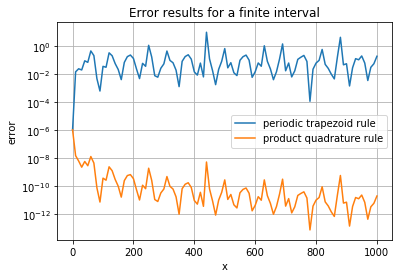

In [6]:
# plot the results
plt.semilogy(x, np.abs(approx1_finite - exact_finite), '-', label = 'periodic trapezoid rule')
plt.semilogy(x, np.abs(approx2_finite - exact_finite), '-', label = 'product quadrature rule')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error results for a finite interval')
legend = plt.legend(loc='center right')

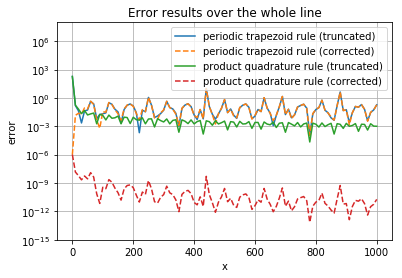

In [7]:
# compute the truncated portion of I(x;a)

truncation = 2 * np.exp(-a*L/2)*(a*np.cos(x*L/2) - x*np.sin(x*L/2))/(a**2 + x**2)

# add this truncated portion to the approximations over the finite interval

approx1 = approx1_finite + truncation
approx2 = approx2_finite + truncation

# compute the exact result

exactresult = 2*a / (a**2 + x**2)

# plot the error results

plt.semilogy(x, np.abs(approx1_finite - exactresult), '-', label = 'periodic trapezoid rule (truncated)' )
plt.semilogy(x, np.abs(approx1        - exactresult), '--', label = 'periodic trapezoid rule (corrected)' )
plt.semilogy(x, np.abs(approx2_finite - exactresult), '-', label = 'product quadrature rule (truncated)' )
plt.semilogy(x, np.abs(approx2        - exactresult), '--', label = 'product quadrature rule (corrected)' )
plt.ylim(1e-15, 1e8)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error results over the whole line')
legend = plt.legend(loc = 'upper right')

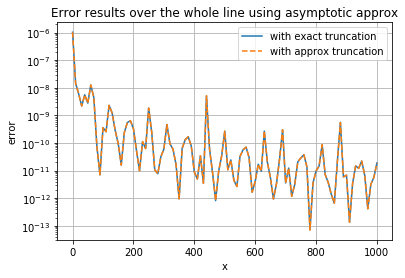

In [9]:
# compute the asymptotic approximation for the truncation

truncation_approx     = np.zeros(Nx)
truncation_approx[0]  = 2 * np.exp(-a*L/2)/a
truncation_approx[1:] = 2 * (np.exp(-a*L/2)/x[1:] 
                             * (a/x[1:]*np.cos(x[1:]*L/2) - np.sin(x[1:]*L/2)) 
                             * (1 - a**2/x[1:]**2) )

# add this approximate truncation to the product quadrature rule results over the finite interval

approx2a = approx2_finite + truncation_approx

# plot the results

plt.semilogy(x, np.abs(approx2  - exactresult), '-',  label = 'with exact truncation')
plt.semilogy(x, np.abs(approx2a - exactresult), '--', label = 'with approx truncation')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error results over the whole line using asymptotic approx')
legend = plt.legend(loc='upper right')